<a href="https://colab.research.google.com/github/yoonputer/test_deeplearning/blob/master/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
import pandas as pd
df_iris = pd.DataFrame(iris.data)
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
import sqlite3
connect = sqlite3.connect('./db.sqlite3')
df_iris.to_sql('iris_resource', connect, if_exists='append', index=False)

In [5]:
df_load = pd.read_sql_query('select * from iris_resource',connect)
df_load.head(4)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


In [6]:
x_data = df_load.to_numpy()
x_data.shape

(150, 4)

In [7]:
import numpy as np

In [8]:
y_data = iris.target
y_data, np.unique(y_data)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([0, 1, 2]))

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_val,y_train, y_val = train_test_split(x_data, y_data)

In [11]:
import tensorflow as tf

In [12]:
model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=(4,))) # input layer 

model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer

model.add(tf.keras.layers.Dense(3, activation='softmax')) # output layer

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics=['acc'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [14]:
# model.fit(x_data, y_data, epochs=50, validation_split=0.3) # 학습
model.fit(x_train, y_train, epochs=50, validation_data=(x_val,y_val)) # 학습

Epoch 1/50
4/4 [==============================] - 1s 67ms/step - loss: 1.2282 - acc: 0.3036 - val_loss: 1.0995 - val_acc: 0.3158
Epoch 2/50
4/4 [==============================] - 0s 8ms/step - loss: 1.0296 - acc: 0.5179 - val_loss: 0.9590 - val_acc: 0.5000
Epoch 3/50
4/4 [==============================] - 0s 9ms/step - loss: 0.9053 - acc: 0.5982 - val_loss: 0.8373 - val_acc: 0.8684
Epoch 4/50
4/4 [==============================] - 0s 9ms/step - loss: 0.7972 - acc: 0.8661 - val_loss: 0.7387 - val_acc: 0.7895
Epoch 5/50
4/4 [==============================] - 0s 9ms/step - loss: 0.7161 - acc: 0.7232 - val_loss: 0.6635 - val_acc: 0.6842
Epoch 6/50
4/4 [==============================] - 0s 8ms/step - loss: 0.6502 - acc: 0.6875 - val_loss: 0.6037 - val_acc: 0.7632
Epoch 7/50
4/4 [==============================] - 0s 9ms/step - loss: 0.5966 - acc: 0.7679 - val_loss: 0.5532 - val_acc: 0.8684
Epoch 8/50
4/4 [==============================] - 0s 10ms/step - loss: 0.5512 - acc: 0.8571 - val_loss:

# Evaluation

In [15]:
#model.evaluate(x_data, y_data) # - loss: 0.4124 - acc: 0.6800

In [16]:
model.evaluate(x_data, y_data)

5/5 [==============================] - 0s 3ms/step - loss: 0.1342 - acc: 0.9733


[0.13418526947498322, 0.9733333587646484]

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
y_pred = model.predict(x_data)
y_pred.shape, y_pred[4]

((150, 3),
 array([9.89880204e-01, 1.01150265e-02, 4.80593826e-06], dtype=float32))

In [19]:
import numpy as np
y_pred_argmax = np.argmax(y_pred, axis=1)
y_pred_argmax.shape, y_pred_argmax[4]

((150,), 0)

In [20]:
y_data.shape, y_data[4]

((150,), 0)

In [21]:
print(classification_report(y_data, y_pred_argmax)) # 데이터 쏠림이 있어서 KFold로 데이터를 shuffle을 해줘야 함

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [22]:
y_data # 순서적으로 나누면 0,1,2가 쏠려서 나뉘는걸 알 수 있음

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
confusion_matrix(y_data, y_pred_argmax)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

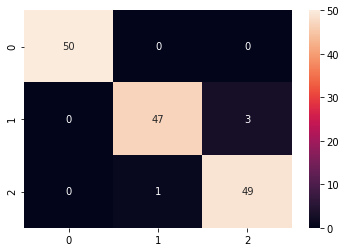

In [24]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_data, y_pred_argmax), annot=True)

-> 대각선에 숫자가 많아야 제대로 된것임 ( 2는 거의 맞추질 못한것)
  
-> 데이터를 셔플 및 수정한 후 다시실행한거라서 이거는 맞음

# Service

In [25]:
x_data[25], y_data[25]

(array([5. , 3. , 1.6, 0.2]), 0)

In [26]:
pred = model.predict([[5. , 3. , 1.6, 0.2]])
pred

array([[9.6942556e-01, 3.0552059e-02, 2.2416287e-05]], dtype=float32)

In [27]:
import numpy as np
np.argmax(pred)

0